# In-Class Quiz Nº 4

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: ruben santos
## Number: A49063

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANT:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q4.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: kMNIST dataset (small version) - pickle file $\texttt{kMNISTsmall.p}$
## This file has the following variables (in a dictionary)
* ### X1: training data ($10000\times(28\times28)$  uint8 array)
* ### y1: classes of the training data (10 japanese characters, class-numbers 0 to 9)
* ### X2: test data ($5000\times(28\times28)$ uint8 array)
* ### y2: classes of the test data (10 japanese characters, class-numbers 0 to 9)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, roc_curve
import pickle
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
#for those who have the GPU enable, maybe uncomment the next lines
#gp=tf.config.list_physical_devices('GPU')
#print(gp)
#tf.config.experimental.set_memory_growth(gp[0],True)

#load data
D=pickle.load(open('kMNISTsmall.p','rb'))
X1=D.X1
X2=D.X2
y1=D.y1
y2=D.y2

#print(X1.shape,X2.shape)

In [2]:
print('X1:',X1.shape,X1.dtype)
print('y1:',y1.shape)
print('X2:',X2.shape)
print('y2:',y2.shape)

X1: (10000, 28, 28) uint8
y1: (10000,)
X2: (5000, 28, 28)
y2: (5000,)


# Question 1: 
##  Build (from scratch) a CNN with an architecture of your choice and with the following restrictions:
## - Use 6 convolutional layers
## - Use 3 pooling layers
## - DO NOT use data augmentation
## - Obtain in the test set an accuracy equal or above 90%
###  Build this network, compile and train the network using the kMNIST training set. Also include the test data as the validation set during training.
###  Plot the  the losses and the accuracies curves for the training and validation sets during the training process.  Comment the results. Print the total number of errors and the confusion matrix for the test dataset.

In [3]:
cnn=keras.models.Sequential()

cnn.add(layers.Conv2D(16, (5, 5), activation='relu',input_shape=(28, 28, 1), padding="same"))
cnn.add(layers.Conv2D(16, (5, 5), activation='relu'))
cnn.add(layers.AveragePooling2D((2, 2)))

cnn.add(layers.Conv2D(64, (5, 5), activation='relu'))
cnn.add(layers.Conv2D(64, (5, 5), activation='relu'))
cnn.add(layers.AveragePooling2D((2, 2)))

cnn.add(layers.Conv2D(128, (1, 1), activation='relu'))
cnn.add(layers.Conv2D(128, (1, 1), activation='relu'))
cnn.add(layers.AveragePooling2D((2, 2)))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(88, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))
#lenet5.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
X1=X1.reshape(-1,28,28,1)
X2=X2.reshape(-1,28,28,1)

y1=keras.utils.to_categorical(y1)
y2=keras.utils.to_categorical(y2)

In [5]:
cnn.compile(optimizer="nadam", 
               loss="categorical_crossentropy", 
               metrics=["accuracy"])

train = cnn.fit(X1, y1, 
                  epochs=20, batch_size=1024, 
                  validation_data=(X2, y2))

Train on 10000 samples, validate on 5000 samples
Epoch 1/20
10000/10000 [==============================] - 18s 2ms/sample - loss: 3.1515 - acc: 0.1895 - val_loss: 2.0392 - val_acc: 0.2636
Epoch 2/20
10000/10000 [==============================] - 16s 2ms/sample - loss: 1.6523 - acc: 0.4511 - val_loss: 1.7366 - val_acc: 0.3766
Epoch 3/20
10000/10000 [==============================] - 15s 1ms/sample - loss: 1.4254 - acc: 0.5327 - val_loss: 1.6744 - val_acc: 0.4650
Epoch 4/20
10000/10000 [==============================] - 15s 1ms/sample - loss: 0.9947 - acc: 0.6964 - val_loss: 1.2032 - val_acc: 0.6076
Epoch 5/20
10000/10000 [==============================] - 14s 1ms/sample - loss: 0.8380 - acc: 0.7390 - val_loss: 1.7433 - val_acc: 0.4974
Epoch 6/20
10000/10000 [==============================] - 17s 2ms/sample - loss: 0.8289 - acc: 0.7498 - val_loss: 1.0392 - val_acc: 0.6644
Epoch 7/20
10000/10000 [==============================] - 13s 1ms/sample - loss: 0.5593 - acc: 0.8228 - val_loss: 0.9

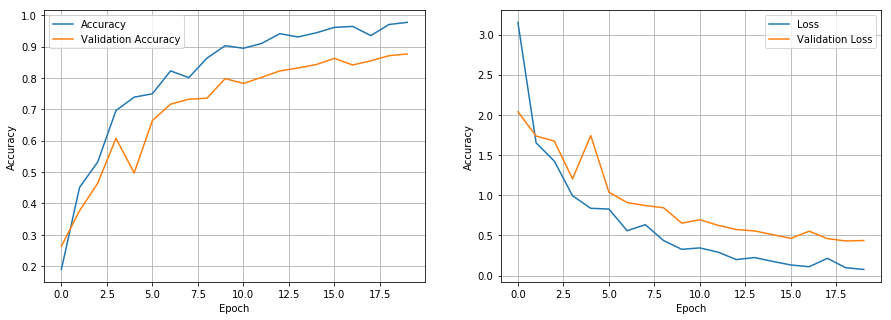

10000/10000 [==============================] - 3s 285us/sample - loss: 0.0656 - acc: 0.9811
0.06556240987330675 0.9811


In [6]:
import matplotlib.pyplot as plt

h=train.history
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(h["acc"], label='Accuracy')
plt.plot(h["val_acc"], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(h["loss"], label='Loss')
plt.plot(h["val_loss"], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()
#plt.axis([0,100,0,5.25])
#plt.ylim([0.5, 1])

test_loss, test_acc = cnn.evaluate(X1, y1)
print(test_loss, test_acc)

In [11]:
# Y2e=cnn.predict(X2)
# ytestPred=np.argmax(Y2e, axis=1)
import numpy as np
rounded_labels=np.argmax(y2, axis=1)
rounded_predictions = cnn.predict_classes(X2, batch_size=128, verbose=0)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)


print('Total number of erros:',np.sum(y2!=rounded_predictions))
print("\nMatriz de confusao:\n", cm)

Total number of erros: 1

Matriz de confusao:
 [[438   4   0   1  26   7   3   5  15   1]
 [  2 431   5   2  10   1  21   0  19   9]
 [  2   1 419  34   8   4   6   5  18   3]
 [  0   0  11 474   1   3   0   0   9   2]
 [  9   6   0  11 442   4   3   4  20   1]
 [  1   5  42   4   7 401  12   3  19   6]
 [  2   7  12  12  20   2 438   3   3   1]
 [  5   3  14   1  21   1  10 425   9  11]
 [  2   0   1  17   0   0   1   0 478   1]
 [  2   1  17   3  15   1   3  10  10 438]]


C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


# Question 2
## Consider that we want to use transfer learning to build a CNN to tackle the kMNIST dataset. For the pre-trained CNN use MobileNetV2. Use only one Dense layer for the output of the network.
### a)  Build and compile this network.
### b)  Pre-process the data so it can be used by the network.
### c)  Train the network for 25 epochs and show the results. Compare the results with the ones obtained in the previous question and state the possible reasons for the differences in performance.

In [2]:
from tensorflow.keras import models
import pickle
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
D=pickle.load(open('kMNISTsmall.p','rb'))
X1=D.X1
X2=D.X2
y1=D.y1
y2=D.y2


## 2.a)

In [5]:

cnnBase = MobileNetV2(weights='imagenet', input_shape=(96, 96, 3), include_top=False)

cnnBase.trainable = False

cnn = models.Sequential()
cnn.add(cnnBase)
cnn.add(layers.Flatten())
cnn.add(layers.Dense(10, activation='softmax'))



cnn.compile(optimizer="nadam",
            loss="categorical_crossentropy",
            metrics=["accuracy"])

## 2.b)

In [6]:
print(X1.shape, X2.shape, y1.shape, y2.shape)

(10000, 28, 28) (5000, 28, 28) (10000,) (5000,)


In [7]:
from skimage.color import gray2rgb

X1 = gray2rgb(X1)
X2 = gray2rgb(X2)

X1 = X1.reshape(-1, 28, 28, 3) / 255.
X2 = X2.reshape(-1, 28, 28, 3) / 255.

Y1 = keras.utils.to_categorical(y1)
Y2 = keras.utils.to_categorical(y2)

print(X1.shape, X2.shape, Y1.shape, Y2.shape)

X1 = tf.image.resize(X1, (96, 96))
X2 = tf.image.resize(X2, (96, 96))

X1 = preprocess_input(X1)
X2 = preprocess_input(X2)


print(X1.shape, X2.shape, Y1.shape, Y2.shape)


(10000, 28, 28, 3) (5000, 28, 28, 3) (10000, 10) (5000, 10)
(10000, 96, 96, 3) (5000, 96, 96, 3) (10000, 10) (5000, 10)


## 2.c)

In [8]:
log = cnn.fit(X1, Y1,
              epochs=25,
              batch_size=128,
              validation_data=(X2, Y2),
              use_multiprocessing=True)

ValueError: When using data tensors as input to a model, you should specify the `steps_per_epoch` argument.

In [ ]:
h = log.history
plt.plot(h["loss"], label='Loss')
plt.plot(h["accuracy"], label='Accuracy')
plt.plot(h["val_loss"], label='Val Loss')
plt.plot(h["val_accuracy"], label='Val Acurracy')
plt.legend()
plt.show()

<hr style="border:2px solid black"> </hr>

# Data: Cats and Dogs dataset (small version) - zip file $\texttt{CatsDogsSmall.zip}$
## This file is divided into two directories (train and test)
## Each one has two sub-directories (dogs and cats)
## The training data consists of a 1000 images of cats and 1000 images of dogs
## The test data consists of 500 images of cats and 500 images of dogs
## The images have various sizes

# Question 3:
## Consider that  we want to use transfer learning to build a CNN to perform a binary classification of the images (either a cat or a dog). Additionally with want to use data augmentation during the training process. 
### a)  Pick a pre-trained network of your choice and incorporate it in a CNN to tackle this problem. Build and compile the CNN.
### b)  Using the $\texttt{ImageDataGenerator}$ from Keras, build two generators (one for training and the other for testing). Note that the training generator has to include data augmentation. Pick one image of a dog and one image of a cat. Show these two original images and five versions of each image with data augmentation. Note: rescale the generated images so that its pixel values are between 0 and 255.
### c)  Train the network for 25 epochs and show the results. Also include the test data as the validation set during training. Make sure to set the $\texttt{steps_per_epoch}$ and the $\texttt{validation_steps}$ so that each training epoch runs through the all the training and test images. Show the evolution of the accuracies and the losses during training and print the number of errors and the confusion matrix for the test data.

## 3.a)

In [16]:
# sem grandes dimensoes 100, 100
import keras

# THE CONVOLUTIONAL BASE
from keras.applications.vgg16 import VGG16  
cnnBase = VGG16(weights="imagenet", include_top=False, input_shape=(100, 100, 3))

#THE NETWORK:
cnn=keras.models.Sequential()
cnn.add(cnnBase)
cnn.add(keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2))   # reduce the size of the feature maps by a factor of
cnn.add(keras.layers.Flatten())                                       #
cnn.add(keras.layers.Dense(128,activation="relu"))                    # Camada normal
cnn.add(keras.layers.Dropout(.4))                                     # Camada de regularização
cnn.add(keras.layers.Dense(5, activation="softmax"))



Using TensorFlow backend.


## 3.b)

In [14]:
from keras.preprocessing.image import ImageDataGenerator

ImgGen=ImageDataGenerator(rotation_range=30, 
                          width_shif_range=0.2, 
                          height_shift_range=0.2, shear_range=0.2, 
                          zoom_range=0.2, horizontal_flip=True, 
                          fill_mode="nearest")

TypeError: __init__() got an unexpected keyword argument 'width_shif_range'

In [15]:
from keras.preprocessing import image

fN="cat10000.jpg"

#import and convert to numpy array
I=image.load_img(fN, target_size=(200, 200))
I=image.img_to_array(I)

#add extra dim
I=I[np.newaxis,:,:,:]
for A in ImgGen.flow(I,batch_size=1):
    A=A.squeeze() #remove extra dim
    plt.imshow(np.uint8(A))

FileNotFoundError: [Errno 2] No such file or directory: 'cat10000.jpg'

In [ ]:
from keras.preprocessing import image

fN="dog1001.jpg"

#import and convert to numpy array
I=image.load_img(fN,target_size=(200,200))
I=image.img_to_array(I)

#add extra dim
I=I[np.newaxis,:,:,:]
for A in ImgGen.flow(I,batch_size=1):
    A=A.squeeze() #remove extra dim
    plt.imshow(np.uint8(A))

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dir = './CatsDogsSmall/'

dataGen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             rotation_range=30,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode="nearest")

trainGen = dataGen.flow_from_directory(directory=dir + "train/",
                                       target_size=(96, 96),
                                       class_mode="categorical",
                                       batch_size=32)

testGen = dataGen.flow_from_directory(directory=dir + "test/",
                                      target_size=(96, 96),
                                      class_mode="categorical",
                                      batch_size=32)

print(trainGen.image_shape, trainGen.class_indices)
print(trainGen.class_indices, trainGen.class_indices)
print(trainGen.samples, testGen.samples)
print(trainGen.batch_size, testGen.batch_size)

Found 2000 images belonging to 2 classes.
Found 998 images belonging to 2 classes.
(96, 96, 3) {'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1} {'cats': 0, 'dogs': 1}
2000 998
32 32


## 3.c)

In [ ]:
# TRAINING THE NETWORK:
opt = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.99)

# Compile the model
cnn.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
#mlp.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
train_advance = cnn.fit_generator(trainGen, steps_per_epoch=25, 
                         validation_data=testGen, validation_steps=10, epochs=100)



In [ ]:
print('Score:',np.sum(ytest==ytestPred)/ytest.shape[0]*100)
print('Total number of erros:',np.sum(ytest!=ytestPred))

from sklearn.metrics import confusion_matrix
print("\nMatriz de confusao:\n", confusion_matrix(ytest, ytestPred))